# Unit 5 - Financial Planning

In [6]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [7]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [8]:
# Set current amount of crypto assets
my_btc = [1.2]
my_eth = [5.3]
my_btc
my_eth

[5.3]

In [9]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [10]:
# Fetch current BTC price
url_b = btc_url
requests.get(url_b)
bitcoin_content = requests.get(url_b)
bitcoin_value = bitcoin_content.content
bitcoin_value
import json
bitcoin_content.json()
datas = bitcoin_content.json()
datas
bitcoin_price = (datas['data']['1']['quotes']['CAD']['price'])
print(bitcoin_price)    





# Fetch current ETH price
url_e = eth_url
requests.get(url_e)
ether_content = requests.get(url_e)
ether_value = ether_content.content
ether_value
import json
ether_content.json()
datas_e = ether_content.json()
datas_e
ether_price = (datas_e['data']['1027']['quotes']['CAD']['price'])
print(ether_price)    
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = (1.2 * 35895.6455)
my_eth_value = (5.3 * 2335.383765)
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

36792.2555
2352.84049
The current value of your [1.2] BTC is $43074.77
The current value of your [5.3] ETH is $12377.53


In [11]:
### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [13]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
print(alpaca_secret_key)
print(alpaca_api_key)

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

RUsd9F36XVYFhxPhNdDELHI38gM1d0vMpcUaf4EJ
PKSMRNR2ZLO7W95N2T1C


In [14]:
# Format current date as ISO format
today = pd.Timestamp("2023-06-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

stock_portfolio.head(10)

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_portfolio[stock_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = stock_portfolio[stock_portfolio['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames

df_ticker = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Preview DataFrame
df_ticker.head(5)

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2023-06-16 04:00:00+00:00  443.02  443.6078  438.97  439.46  110461387   

                                                     AGG                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2023-06-16 04:00:00+00:00      619074  440.999282  98.09  98.275  97.905   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-06-16 04:00:00+00:00  98.14  4599777       26718  98.118495

In [15]:
# Pick AGG and SPY close prices
prices_df = pd.DataFrame()
prices_df['SPY'] = df_ticker['SPY']['close']
prices_df['AGG'] = df_ticker['AGG']['close']
prices_df.index = prices_df.index.date
prices_df.reset_index(drop=True, inplace=True)
prices_df

agg_close_price = prices_df['AGG']
spy_close_price =prices_df['SPY']
                             


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $0    98.14
Name: AGG, dtype: float64
Current SPY closing price: $0    439.46
Name: SPY, dtype: float64


In [16]:
# Compute the current value of shares
my_spy_value = 439.46 * my_spy
my_agg_value = 98.14 * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value}")

The current value of your 50 SPY shares is $21973.0
The current value of your 200 AGG shares is $19628.0


### Savings Health Analysis

In [23]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
crypto = (my_btc_value + my_eth_value)
print(crypto)
shares = (my_spy_value + my_agg_value)

print(shares)
# Create savings DataFrame


columns = ["amount"]
data = [crypto, shares]
index =['crypto', 'shares']
savings_df = pd.DataFrame(data ,index, columns)




# Display savings DataFrame
print(savings_df)

55452.3085545
41601.0
              amount
crypto  55452.308554
shares  41601.000000


<Axes: title={'center': 'shares/crypto Portfolio Composition'}, ylabel='amount'>

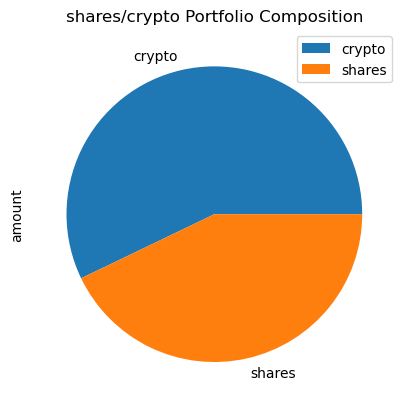

In [20]:
# Plot savings pie chart

savings_df.plot.pie(y="amount", title="shares/crypto Portfolio Composition")

In [35]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
total_savings = crypto +shares
print(total_savings)



# Validate saving health
if total_savings > emergency_fund:
    print(f" We congatulate you for settinng asside enough money in this fund")
elif total_savings == emergency_fund:
    print(f" We congatulate you for reaching your financial goal")
else:
    print(f" you need to add more money in your emergency fund to reach your financial goal")

36000
97053.30855449999
 We congatulate you for settinng asside enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [36]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG

multy_year_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

multy_year_portfolio.head(10)

# Reorganize the DataFrame
# Separate ticker data
SPY = multy_year_portfolio[multy_year_portfolio['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = multy_year_portfolio[multy_year_portfolio['symbol'] == 'AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY,AGG], axis=1, keys= ['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [41]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [42]:
# Printing the simulation input data
MC_30.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.008707  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   

                                                                             \
                               high       low    close   volume trade_count   
timestamp                                                                     
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.605  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.810  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.860  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.140  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.970  2718710       12697   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001853  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530

In [43]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 110.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 120.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 130.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 140.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 150.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 160.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 170.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 180.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 190.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 200.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 210.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 220.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 230.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 240.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 250.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 260.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 270.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 280.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 290.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 300.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 310.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 320.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 330.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 340.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 350.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 360.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 370.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 380.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 390.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 400.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 410.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 420.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 430.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 440.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 450.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 460.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 470.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 480.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

Running Monte Carlo simulation number 490.


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highl

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998125,0.999845,0.992117,0.997798,0.996701,1.005490,1.002290,1.011121,0.995682,0.999808,...,1.003868,0.998117,1.001425,1.003226,0.992246,0.998529,1.003856,1.003671,1.012160,0.979036
2,1.008328,0.999834,0.988855,0.993443,1.000618,1.010887,1.000163,1.010721,0.988501,1.001884,...,1.006812,0.999816,0.997885,1.006257,1.004504,1.006977,0.998996,0.992359,1.014183,0.980626
3,1.009287,1.010624,0.991029,0.987066,0.994263,1.015634,0.993841,1.018863,0.988803,1.008334,...,1.015971,1.009619,1.008311,1.000081,1.001769,1.009551,1.000846,0.990509,1.009409,0.971897
4,1.011367,1.010607,0.995932,0.980646,1.000045,1.020470,0.991523,1.023720,0.983496,1.005250,...,1.029679,1.007657,1.015656,1.015361,1.000080,1.005466,0.993977,0.989782,1.027315,0.979306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.259816,38.818118,10.734958,10.296088,7.158973,31.522745,18.853647,10.950540,15.408762,23.137850,...,19.319581,17.339456,11.725108,38.790317,24.740871,21.644863,17.254023,19.853979,11.239681,29.244327
7557,20.100845,39.227581,10.683294,10.256499,7.150161,31.574538,18.970137,10.946837,15.569145,23.286285,...,19.434103,17.411898,11.782774,38.623049,24.802782,21.389485,17.209748,19.769917,11.227223,29.077719
7558,20.235668,39.428904,10.640034,10.206267,7.107021,32.038025,18.670812,11.039031,15.773358,23.507153,...,19.298128,17.255080,11.827953,38.738107,24.837175,21.424257,17.257048,19.577659,11.264856,29.138990
7559,19.900883,39.285724,10.607230,10.269277,7.144803,31.771694,18.725734,11.100334,15.746328,23.717041,...,19.347298,17.221555,11.963981,38.679564,24.983000,21.306550,17.342049,19.707202,11.329793,29.202987


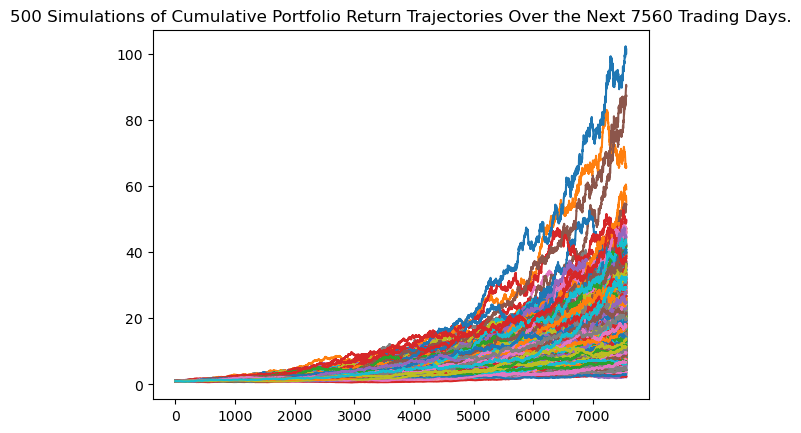

In [44]:
# Plot simulation outcomes
line_plot = MC_30.plot_simulation()


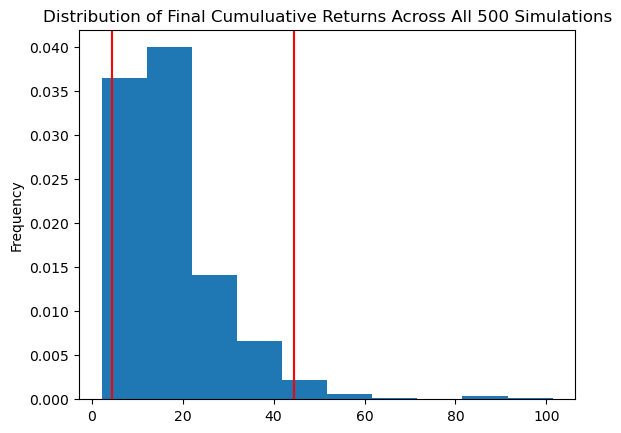

In [45]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             17.780981
std              11.659134
min               2.208848
25%              10.373701
50%              14.976451
75%              21.698523
max             101.355851
95% CI Lower      4.483939
95% CI Upper     44.520611
Name: 7560, dtype: float64


C:\Users\green\Downloads\Starter_Code_5\financial_planner-module5\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [47]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89678.78 and $890412.23


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [48]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134518.18 and $1335618.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


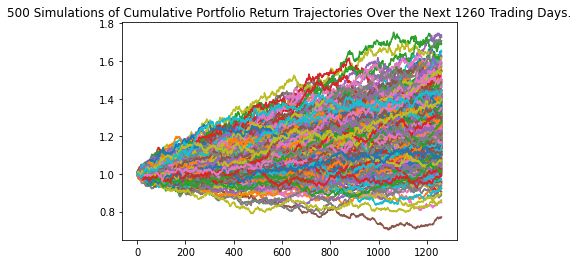

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

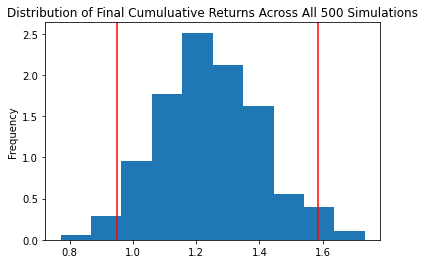

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


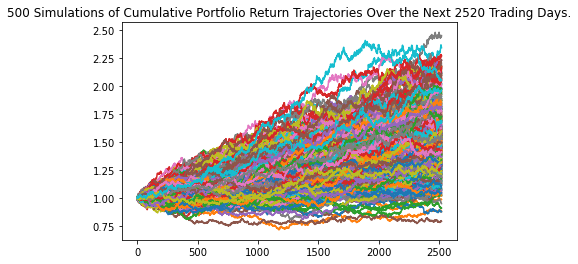

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

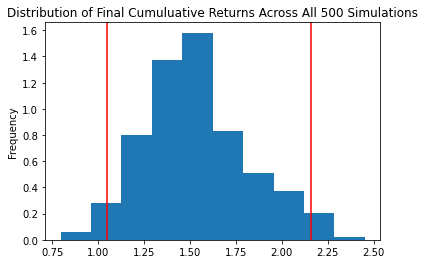

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
